In [1]:
suppressPackageStartupMessages(library("car"))
suppressPackageStartupMessages(library("effects"))
suppressPackageStartupMessages(library("corrplot"))

# Diagnostic Plots
In the previous part of this lesson, we examined a number of diagnostic measures that we can use to assess both the model assumptions and identify any data features that may indicate modelling issues. Although we discussed interpretation of their numeric values, it is more typical to *visualise* these measures in various useful ways. We already saw some indication of these visualisations earlier when calling `plot(mod)` on a model fit using `lm()`. In this part of the lesson, we will discuss all the standard plots that `R` produces, as well as some additional visualisations that can be useful for assessing the suitability of the model for any given dataset.

## Diagnostic Plots for `lm()`
When working with the `lm()` function, there are several standard plots that are produced. These are summarised in the table below, alongside their main purpose and a brief description of what we want to see if there are no problems. We will dig into each of these in more detail below.

| Plot                  | Main purpose       | What we want to see                                                |
| --------------------- | -------------------| -------------------------------------------------------------------|
| Residuals vs Fitted   | Linearity          | The pattern across the fitted values is a flat line.               |
| QQ Normal             | Residual normality | All points lying along the main diagonal.                          |
| Scale-Location        | Homoscedasticity   | An equal vertical scattering of points.                            |
| Residuals vs Leverage | Outliers           | No points within the bands in the top-right or bottom-left corners.|

By default, these plots are presented one after another, with `R` waiting for the user to hit <kbd>Enter</kbd> to move on to the next plot. If you want to see all plots together, you can run[^par-foot]  

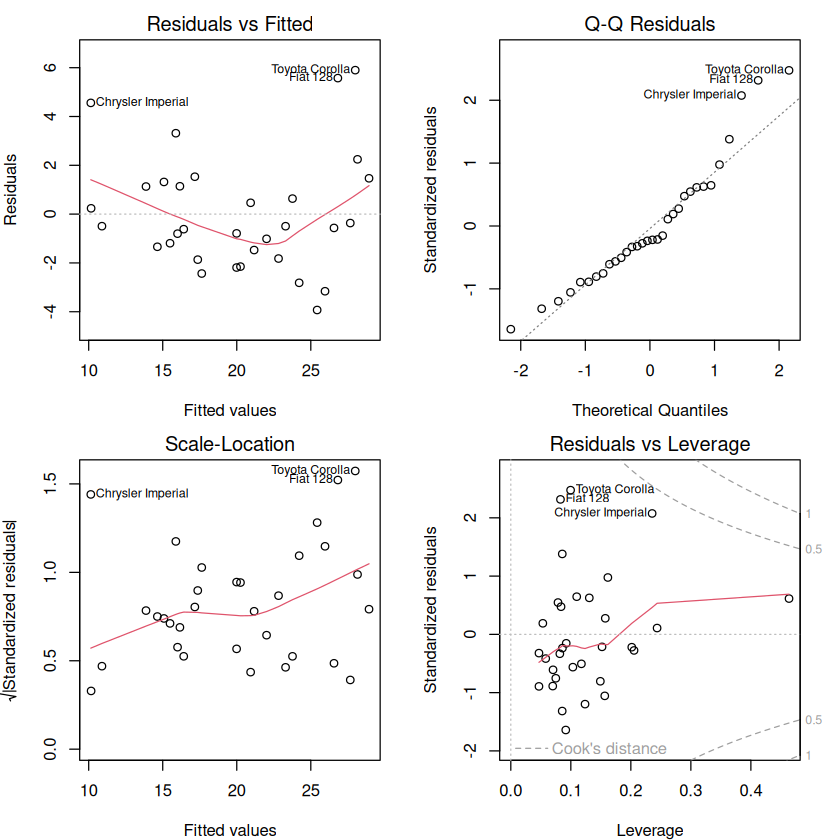

In [2]:
data(mtcars)
mod <- lm(mpg ~ wt + hp + cyl, data=mtcars)
par(mfrow=c(2,2), mar=c(4,4,2,2)) # 2x2 grid with tighter margins
plot(mod)


## Residual vs Fitted Plot
The first plot produced by `R` is the Residuals vs Fitted plot, which you can generate on its own by calling

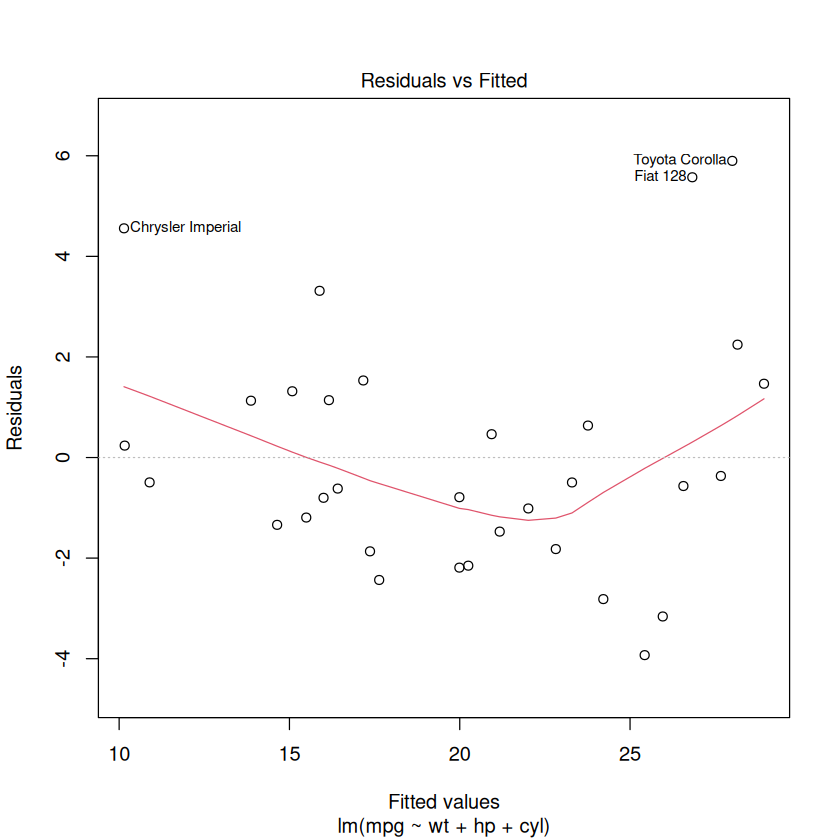

In [3]:
plot(mod, which=1)

This plots the fitted values along the $x$-axis with the raw residuals on the $y$-axis. The three largest absolute values of the residuals are automatically labelled, which is a behaviour you can change by setting the argument `id.n` in the call to `plot()` (e.g. `id.n=0` will turn the labelling *off*, `id.n=5` will label the 5 largest points and so on). Remember, this labelling is not based on any threshold, it is a relative measure and does not automatically denote outliers.

### Interpreting the Plot
In terms of interpreting this plot, remember that the $y$-axis shows the *raw* residuals. So this plot is not as useful for detecting outliers. Similarly, the influence of leverage has not been removed and so assessing homoscedasticity is also not sensible here. What *is* useful here is assessing whether the assumption of a *linear relationship* appears valid. If the relationship is linear, then we expect a roughly equal scattering of residuals around the regression line, with most points falling on or near the line. In terms of the residuals, this is indicated by values close to 0, as a residual of 0 indicates a perfect fit. In this plot, this is indicated by a $y$-axis value of 0. If the data fits the regression line, then across the various predicted values we expect most points to sit around 0. This should look like a random scattering of points around the vertical 0 point.



To help discern any subtle patterns here, `R` using a method known as [LOESS smoothing](https://en.wikipedia.org/wiki/Local_regression) to draw a wiggly line through the main pattern in the residuals. The closer this is to a flat line, the more confident we feel about the linearity assumption. In the example above, there is some evidence of a depature from linearity, as the residuals dip down around the higher fitted values. Remember that the fitted values are a combination of all the predictor variables and so we would need to investigate each individually to find out where this pattern may be coming from.

### Simulated Example
To get a sense of what this plot would look like with *extreme* depatures from linearity, the plot below shows this same diagnostic applied to simulated data with a true linear relationship (*top left*) and then three other datasets with true non-linear relationships. This lack of fit should be very clear. Although you are unlikely to see anything this extreme in a real dataset, this should give you a clear idea about what to look for in this plot.

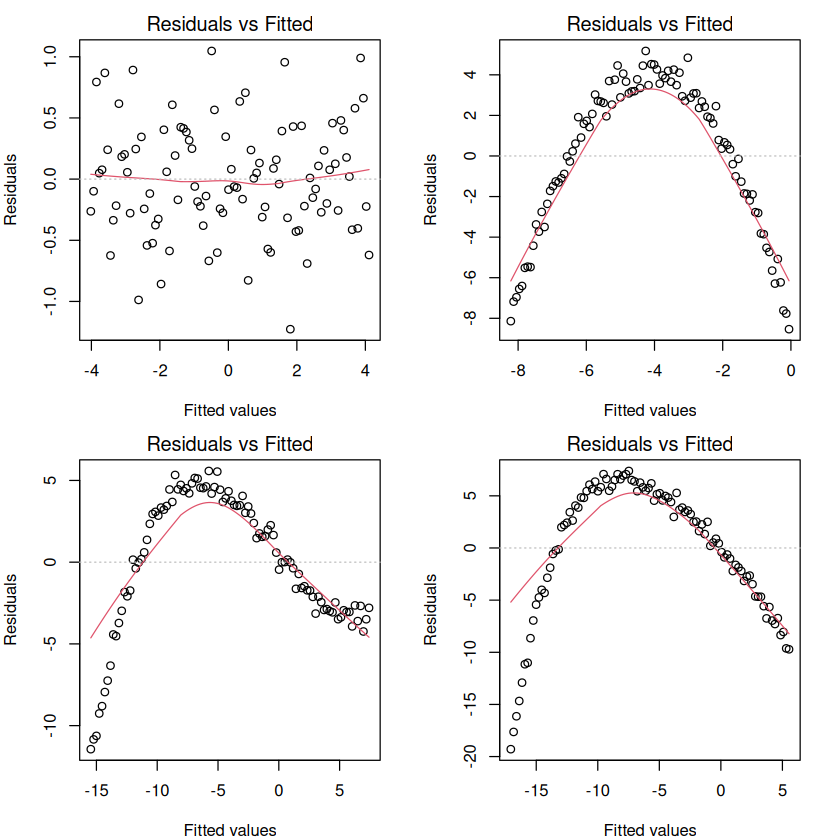

In [4]:
set.seed(123)

# Number of observations
n <- 100
x <- seq(-2, 2, length.out = n)

# True relationships (increasing polynomial degree)
y_linear    <- 2 * x + rnorm(n, sd = 0.5)
y_quadratic <- 2 * x - 3 * x^2 + rnorm(n, sd = 0.5)
y_cubic     <- 2 * x - 3 * x^2 + 1.5 * x^3 + rnorm(n, sd = 0.5)
y_quartic   <- 2 * x - 3 * x^2 + 1.5 * x^3 - 0.5 * x^4 + rnorm(n, sd = 0.5)

# Fit LINEAR models to each
fit_linear    <- lm(y_linear ~ x)
fit_quadratic <- lm(y_quadratic ~ x)
fit_cubic     <- lm(y_cubic ~ x)
fit_quartic   <- lm(y_quartic ~ x)

# Create residual plots
par(mfrow=c(2,2), mar=c(4,4,2,2))
plot(fit_linear, which=1, id.n=0)
plot(fit_quadratic, which=1, id.n=0)
plot(fit_cubic, which=1, id.n=0)
plot(fit_quartic, which=1, id.n=0)

options(repr.plot.width=7, repr.plot.height=7, repr.plot.resolution=120)


## Q-Q Residuals Plot
The second plot produced by `R` is the Q-Q Residuals plot, which you can generate on its own by calling

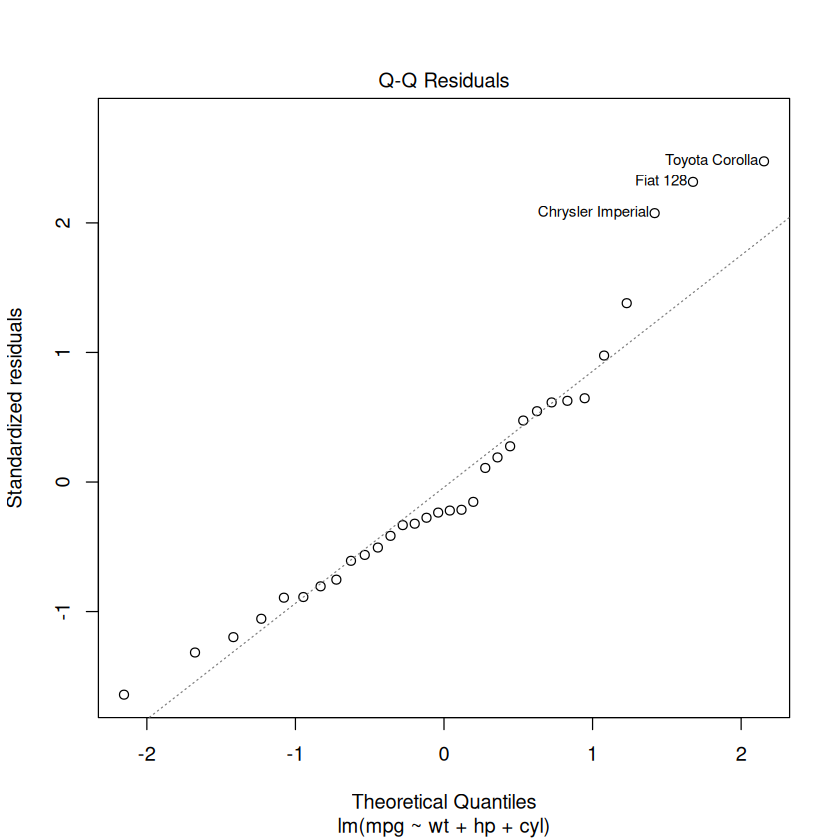

In [5]:
plot(mod, which=2)

Here we see the standardised residuals on the $y$-axis and values from a theoretical normal distribution on the $x$-axis. These values are paired together by splitting both the data and the theoretical distribtion into *quantiles* (hence the name *quantile-quantile* or *Q-Q* plot). A quantile is just a way of splitting data into chunks. This is typically done by ordering the data, calculating the cumulative probability of each observation and then matching it with the value from a normal distributon with the same cumulative probability. As with the previous plot, `R` automatically labels the 3 largest absolute values of the standardised residuals. Again, this is not based on any threshold and does not necessarily indicate outliers.

### Interpreting the Plot
Interpreting the Q-Q Residuals plot is very simple. The idea is that if the data matches the theoretical distribution, the values will lie along the diagnal line in the plot. If the values deviate from this line, this is indicative a deviation from the theoretical distribution. 

An important point here is the use of the *standardised* residuals. Remember that the logic of examining the whole distribution of errors is that they were assumed i.i.d. Unfortunately, we know this is not true of the residuals. So, the shape of the residual distribution is still normal, but the variance differs due to leverage. Because of this, the logic of collapsing the residuals together to assess the full distribution somewhat falls apart. This is why it is important to assess the distribution of the *standardised* residuals and not the *raw* residulas, because the standardised residuals have had the effect of leverage removed and thus should be much closer to i.i.d.

### Simulated Example
To get a sense of what this plot would look like under different circumstances, the plots below show data drawn from a true normal distribution (*top left*) as well as several other non-normal distributions.

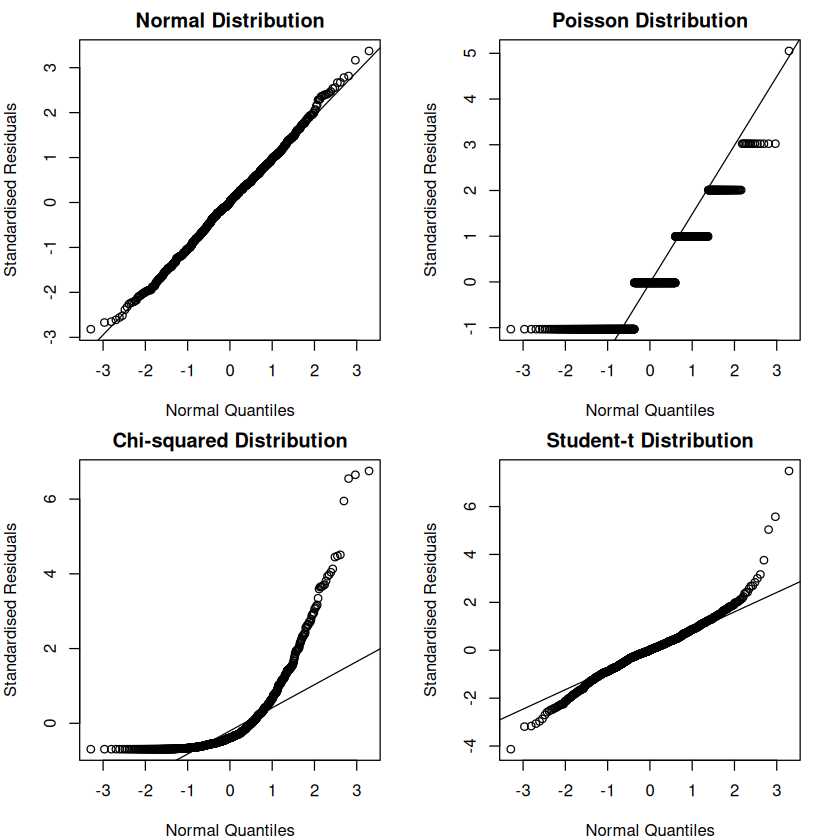

In [6]:
# Set up plot grid
par(mfrow=c(2,2), mar=c(4,4,2,2))

# Normal sim
temp.y     <- rnorm(1000)
temp.mod   <- lm(temp.y ~ 1)
temp.resid <- rstandard(temp.mod)
qqnorm(temp.resid, main="Normal Distribution",
       xlab="Normal Quantiles", ylab="Standardised Residuals")
qqline(temp.resid)

# Poisson sim
temp.y     <- rpois(1000,lambda=1)
temp.mod   <- lm(temp.y ~ 1)
temp.resid <- rstandard(temp.mod)
qqnorm(temp.resid, main="Poisson Distribution",
       xlab="Normal Quantiles", ylab="Standardised Residuals")
qqline(temp.resid)

# Chi^2 sim
temp.y     <- rchisq(1000,df=1)
temp.mod   <- lm(temp.y ~ 1)
temp.resid <- rstandard(temp.mod)
qqnorm(temp.resid, main="Chi-squared Distribution",
       xlab="Normal Quantiles", ylab="Standardised Residuals")
qqline(temp.resid)

# t sim
temp.y     <- rt(1000,df=5)
temp.mod   <- lm(temp.y ~ 1)
temp.resid <- rstandard(temp.mod)
qqnorm(temp.resid, main="Student-t Distribution",
       xlab="Normal Quantiles", ylab="Standardised Residuals")
qqline(temp.resid)

Remember as well that our ability to determine the distribution will depend upon the sample size. For example, the plots below all show random draws from a normal distribution with $n=10$. Hopefully it is clear how variable the distribution of the sample can be, even when the normality assumption is met.

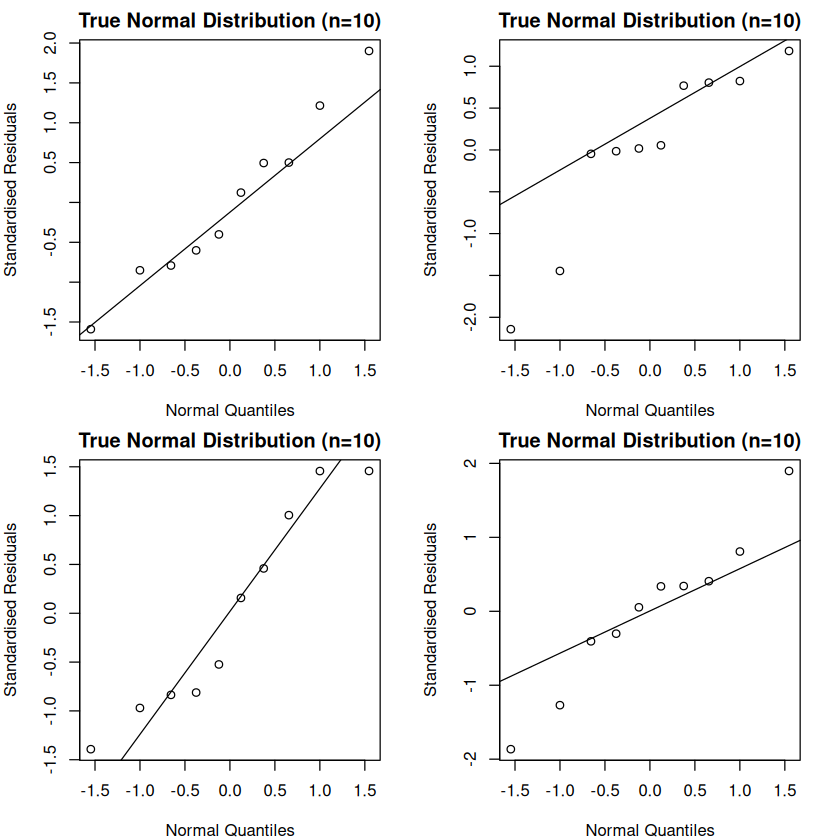

In [7]:
set.seed(999)

# Set up plot grid
par(mfrow=c(2,2), mar=c(4,4,2,2))

for (i in 1:4){
     # Fit the model
     temp.y     <- rnorm(10)
     temp.mod   <- lm(temp.y ~ 1)
     temp.resid <- rstandard(temp.mod)

     # Q-Q plot: Normal quantiles vs standardised residuals
     qqnorm(temp.resid, main="True Normal Distribution (n=10)",
               xlab="Normal Quantiles", ylab="Standardised Residuals")
     qqline(temp.resid)
}    


## Scale-Location Plot
The third plot produced by `R` is the Scale-Location plot, which you can generate on its own by calling

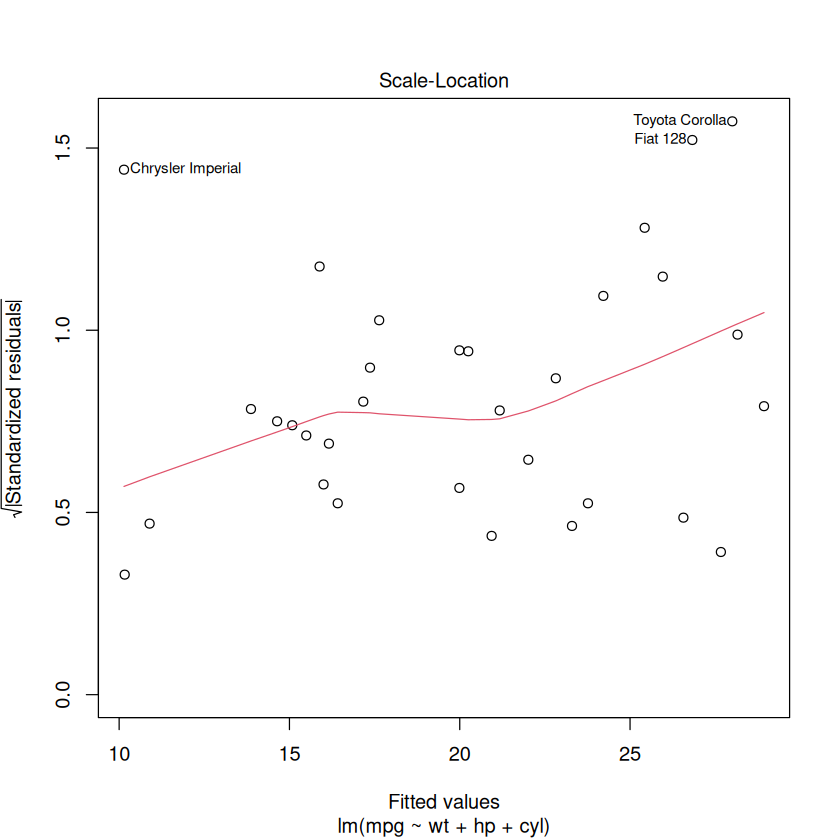

In [8]:
plot(mod, which=3)

This shows the fitted values along the $x$-axis with the square-root of the absolute value of the residuals on the $y$-axis. Again, the 3 largest residuals are highlighted. The main aim of this plot is to assess *homoscedasticity*, but it requires a little explanation around why the $y$-axis used $\sqrt{|r_{i}|}$. To begin with, we use the standardised residuals because these have been corrected for leverage and thus will not mislead us about heteroscedasticity. Taking the absolute value of the residuals then allows us to focus on their magnitude, rather than their sign. We care about the *variance* here and so it does not matter whether a residual has a large positive value or a large negative value, it contributes to the variance equally. We therefore just focus on the magnitude of the residuals along the $y$-axis from the bottom of the plot. However, an issue with using the absolute value is that the visual scale of the $y$-axis can be distorted by extreme values, squashing all other values to the bottom of the plot. To prevent this, the square-root is used to reduce skew and make the vertical spread of points easier to see.

### Interpreting the Plot
To interpret the Scale-Location plot, we simply look to see whether the vertical pattern of points is roughly the same throughout the range of fitted values. If it is, this indicates that the degree to which the raw data differs from the model is roughly the same across the whole dataset. To make this easier to see, `R` again uses a LOESS smoother to draw the general pattern in these data. The close this line is to *flat*, then more confident we are that no violations of homoscedasticity have occurred. However, if there is some clear pattern here that deviates from a flat line, this could indicate a problem.


### Simulated Example
To get a better sense of what to look for in this plot, the examples below show true homoscedastic data (*top-left*) along with 3 examples of heteroscedasticity.

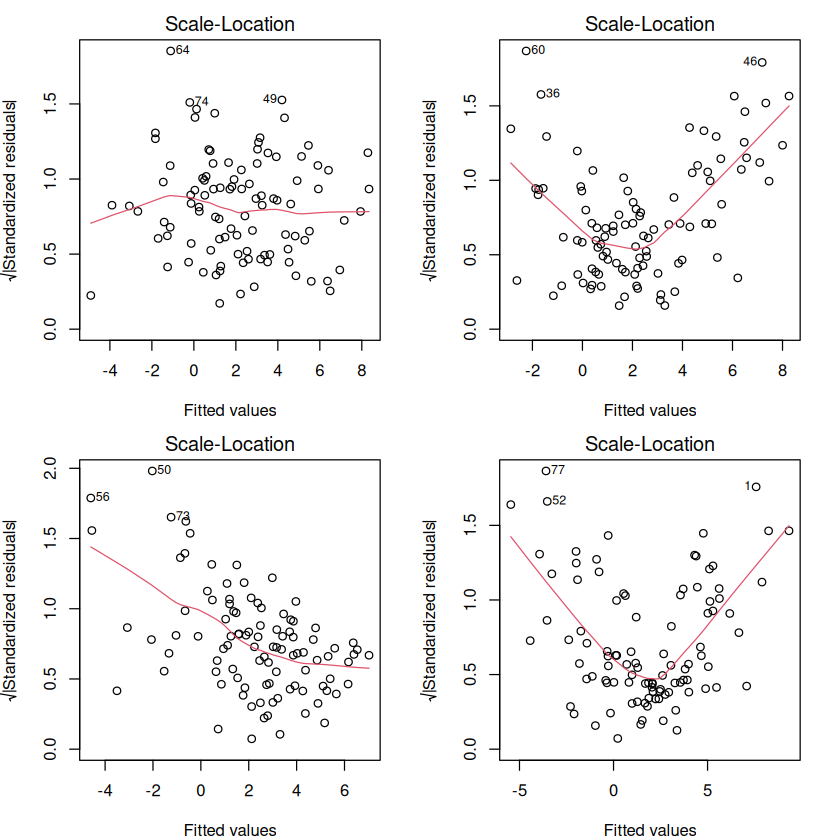

In [9]:
# Load libraries
par(mfrow=c(2,2), mar=c(4,4,2,2))  # 2x2 plot layout
set.seed(123)
options(warn=-1)

# 1. Homoscedastic data
x1 <- rnorm(100)
y1 <- 2 + 3 * x1 + rnorm(100, sd = 1)
mod1 <- lm(y1 ~ x1)
plot(mod1, which=3)

# 2. Increasing variance
x2 <- rnorm(100)
y2 <- 2 + 3 * x2 + rnorm(100, sd = 1 + x2^2)
mod2 <- lm(y2 ~ x2)
plot(mod2, which=3)

# 3. Decreasing variance
x3 <- rnorm(100)
y3 <- 2 + 3 * x3 + rnorm(100, sd = 2 - x3)
mod3 <- lm(y3 ~ x3)
plot(mod3, which=3)

# 4. Funnel shape
x4 <- rnorm(100)
y4 <- 2 + 3 * x4 + rnorm(100, sd = abs(x4))
mod4 <- lm(y4 ~ x4)
plot(mod4, which=3)

options(warn=0)


## Residuals vs Leverage Plot
The final plot produced by `R` is the Residuals vs Leverage plot, which can be generated on its own using[^hidden-foot]

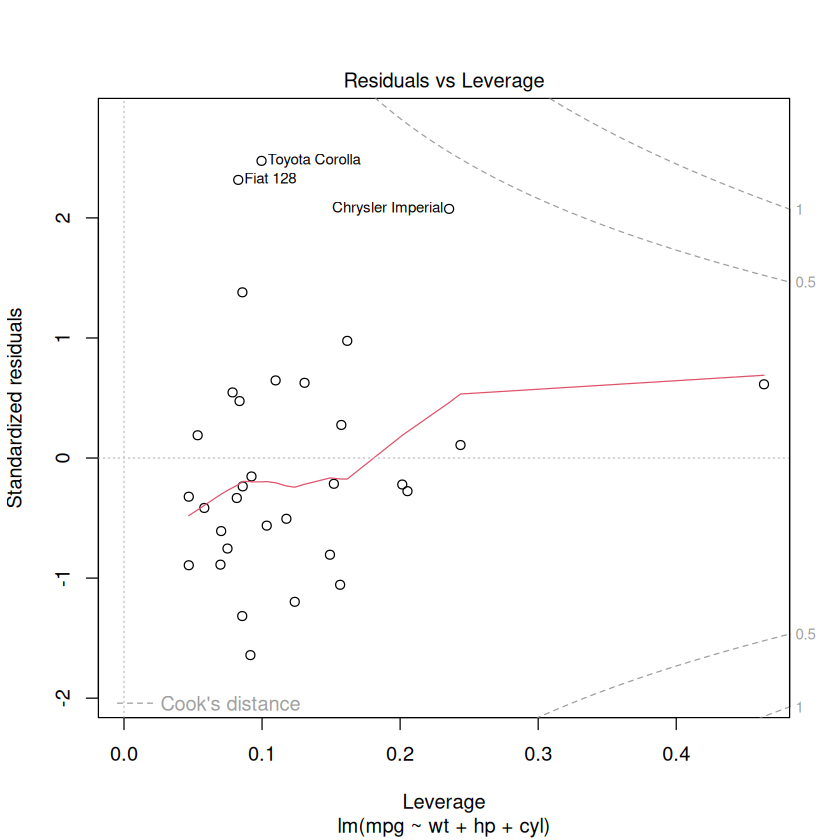

In [10]:
plot(mod, which=5)

This shows the leverage values along the $x$-axis and the studentised residuals[^label-foot] along the $y$-axis, with isocontour lines denoting which combinations of leverage and residual values lead to Cook's Distances of 0.5 and 1.

### Interpreting the Plot
The aim of this plot is to highlight outliers in both predictor space, outcome space or both. Any point that sits far along the $x$-axis has high leverage and thus might be an outlier in predictor space. Similarly, any point that sits far along the $y$-axis (in either direction) has a large studentised residuals and so might be an outlier in outcome space. Points that have large values along *both* axes will sit in the top-right or bottom-right corners of the plot. These regions correspond to large values of Cook's Distance, as indicated by the curved boundaries in the corners of the plot. Any data points that sit within these boundaries may require some careful investigation.

### Simulated Example
The examples below show 4 different scenarios that can be highlighted by this plot. The *top-left* shows data with no outliers (using a cutoff of 3 standard deviations) and no high-leverage values. The *top-right* shows data with outliers but no high leverage. The *bottom-left* shows data with high leverage and no outliers. The *bottom-right* shows data with both high leverage and outliers, leading to values of $D_{i} > 0.5$.

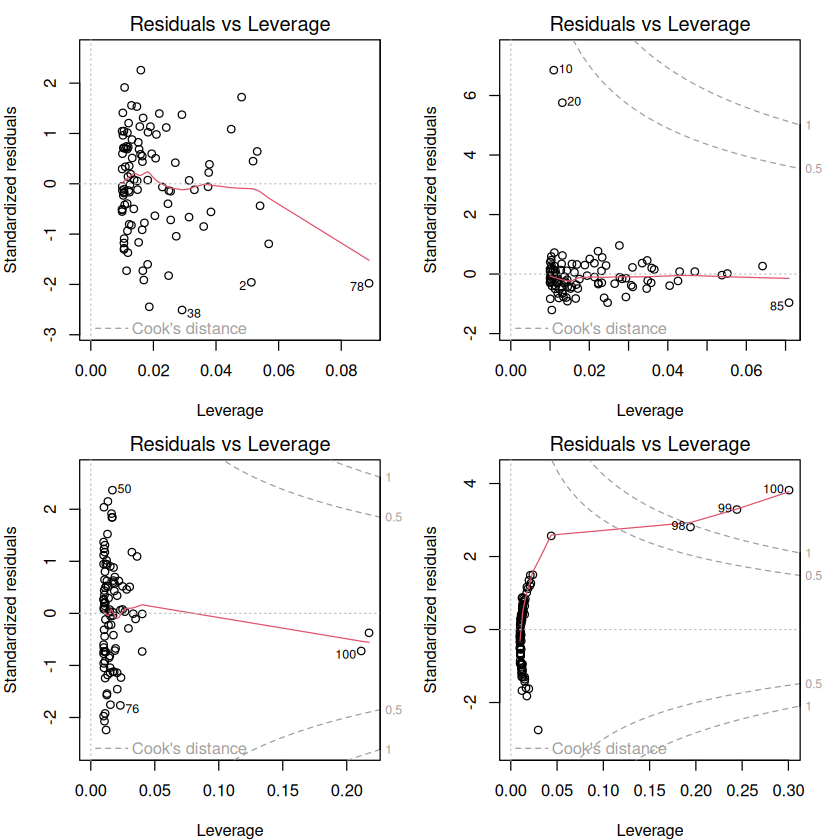

In [11]:
set.seed(666)
par(mfrow=c(2,2), mar=c(4,4,2,2))  # 2x2 layout

make_plot <- function(x, y) {
  model <- lm(y ~ x)
  leverage <- hatvalues(model)
  stud_resid <- rstudent(model)
  cooks <- cooks.distance(model)
  
  plot(model, which=5)
}

# 1. No outliers, no high leverage
x1 <- rnorm(100)
y1 <- 2 + 3 * x1 + rnorm(100)
make_plot(x1, y1)

# 2. Outliers, no high leverage
x2 <- rnorm(100)
y2 <- 2 + 3 * x2 + rnorm(100)
y2[c(10, 20)] <- y2[c(10, 20)] + 15  # Inject outliers
make_plot(x2, y2)

# 3. High leverage, no outliers
x3 <- c(rnorm(98), -5, 5)
y3 <- 2 + 3 * x3 + rnorm(100)
make_plot(x3, y3)

# 4. Outliers AND high leverage
x4 <- c(rnorm(97), 8, 9, 10)
y4 <- c(rnorm(97), 40, 45, 50)  # Extreme response values
make_plot(x4, y4)


## Effects Plots

[^VIF-foot]: Note that some authors suggest VIF > 10 to be the marker for concerning multicollinearity. Here, we would recommend the more cautious approach of using VIF > 5.

[^NASA-foot]: [Faraway (2005)](https://www.utstat.toronto.edu/~brunner/books/LinearModelsWithR.pdf) provides a real-world example of why this is *not* good practise. This concerns the delay in the discovery of the hole in the Ozone layer due to NASA's automatic data analysis algorithms discarding very low readings assumed to be mistakes.

[^par-foot]: You can reset this by calling `par(mfrow=c(1,1))`, otherwise all your future plots in the same `R` session will be placed into a 2 x 2 grid.

[^hidden-foot]: The observant amongst you will have notice that this uses `which=5` rather than `which=4`. There are in fact *two* hidden diagnostic plots available by calling `which=4` and `which=6`.

[^label-foot]: Notice that the $y$-axis is actually mislabelled in this plot as *Standardised residuals* rather than *Studentised residuals*.